<a href="https://colab.research.google.com/github/njanrepo/MLEProject/blob/main/ML_Proj_stock_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install yfinance scikit-learn statsmodels seaborn

In [ ]:
import yfinance as yf

In [48]:
symbol='^GSPC'
df= yf.download(symbol, start='2021-01-01', end='2021-11-10')

[*********************100%***********************]  1 of 1 completed


In [49]:
df.shape

(216, 6)

In [50]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02
mean,4204.341942,4224.122088,4185.351804,4206.955968,4206.955968,3.933196e+09
std,253.592453,250.523130,257.434445,254.262488,254.262488,1.165391e+09
min,3698.020020,3737.830078,3662.709961,3700.649902,3700.649902,2.371630e+09
25%,3942.122498,3969.217590,3921.935059,3954.747559,3954.747559,3.087422e+09
50%,4222.489990,4235.255127,4203.010010,4224.245117,4224.245117,3.602580e+09
75%,4407.359863,4425.282471,4391.634888,4413.630005,4413.630005,4.580242e+09
max,4707.250000,4718.500000,4694.390137,4701.700195,4701.700195,9.878040e+09


In [51]:
df.nunique()

Open         214
High         215
Low          216
Close        216
Adj Close    216
Volume       216
dtype: int64

In [52]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [53]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [54]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [55]:
df.head()

,open,high,low,close,adj_close,volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000


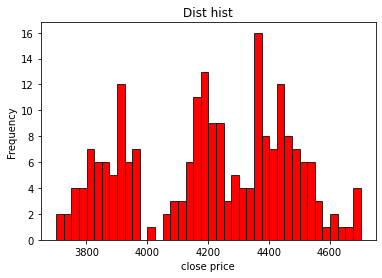

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(df.close, bins=40, color='red', alpha=1)
plt.ylabel("Frequency")
plt.xlabel('close price')
plt.title('Dist hist')
plt.show()

In [57]:
def make_X_and_Y(close_prices, period=6):
  X = []
  y = []
  for i in range(len(close_prices)- period):
    X.append(close_prices[i:i+period])
    y.append(close_prices[i+period])
  return X,y

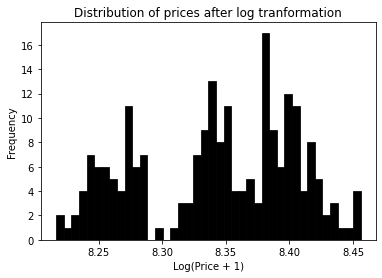

In [58]:
log_price = np.log1p(df.close)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [59]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor


In [60]:
X,y=make_X_and_Y(list(df.close))

def return_model(X, y):
  clf = RandomForestRegressor()
  clf.fit(X,y)
  return clf
period = 6
print(np.array(list(df.close)[-period:]).reshape((1,-1)))
latest_feat = np.array(list(df.close)[-period:]).reshape((1,-1))
classifier = return_model(X,y)
tomorrow_prediction = classifier.predict(latest_feat)
print("Tomorrow Predicted value is : ", tomorrow_prediction[0])
print("Today's value is: ", df.close[-1])

[[4630.64990234 4660.56982422 4680.06005859 4697.52978516 4701.70019531
  4685.25      ]]
Tomorrow Predicted value is :  4689.208798828125
Today's value is:  4685.25


In [ ]:
for i in range(len(df.close)- period):
  X = np.array(list(df.close)[i:i+period]).reshape((1,-1))
  actual = df.close[i+period]
  pred = classifier.predict(X)
  print (actual , pred)

In [70]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [71]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [76]:
head = 10
X,y=make_X_and_Y(list(df.close))
for model in regressors[:head]:
    start = time()
    model.fit(X,y)
    train_time = time() - start
    start = time()
    X_test = np.array(list(df.close)[-period:]).reshape((1,-1))
    
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.001s
	Prediction time: 0.001s


NameError: ignored